<a href="https://www.kaggle.com/code/dilippokhrel/cancer-detection?scriptVersionId=110829054" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf

In [4]:
from PIL import Image
import cv2

In [5]:
df=pd.DataFrame()
df['path']='path'
df['label']='label'
benign_path='../input/skin-cancer-malignant-vs-benign/train/benign'
for el in os.listdir(benign_path):
    if '.jpg' in el:
        df=df.append({'path':benign_path+'/'+el,'label':0},ignore_index=True)
    

In [6]:
malignant_path='../input/skin-cancer-malignant-vs-benign/train/malignant'
for el in os.listdir(malignant_path):
    df=df.append({'path':malignant_path+'/'+el,'label':1},ignore_index=True)

In [7]:
len(df)

2637

In [8]:
df.head()

,path,label
0,../input/skin-cancer-malignant-vs-benign/train...,0
1,../input/skin-cancer-malignant-vs-benign/train...,0
2,../input/skin-cancer-malignant-vs-benign/train...,0
3,../input/skin-cancer-malignant-vs-benign/train...,0
4,../input/skin-cancer-malignant-vs-benign/train...,0


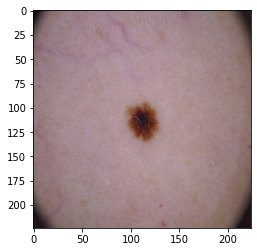

In [9]:
img=plt.imread(df.iloc[600]['path'])
plt.imshow(img)

In [10]:
x=[]
for el in df['path']:
    x.append(cv2.resize(cv2.imread(el, cv2.IMREAD_UNCHANGED),(150,150), interpolation = cv2.INTER_AREA))


In [11]:
x=np.array(x)

In [12]:
len(x)

2637

In [13]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(50,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

model.fit(tf.convert_to_tensor(x,dtype='float32'),tf.convert_to_tensor(np.array(df['label']),dtype='float32'),epochs=50)

2022-11-13 03:15:54.328060: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 03:15:54.438582: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 03:15:54.439356: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 03:15:54.441022: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/50


2022-11-13 03:16:00.203440: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


83/83 [==============================] - 9s 16ms/step - loss: 4.3591 - accuracy: 0.6697
Epoch 2/50
83/83 [==============================] - 1s 14ms/step - loss: 0.4410 - accuracy: 0.7929
Epoch 3/50
83/83 [==============================] - 1s 14ms/step - loss: 0.3460 - accuracy: 0.8369
Epoch 4/50
83/83 [==============================] - 1s 14ms/step - loss: 0.2860 - accuracy: 0.8699
Epoch 5/50
83/83 [==============================] - 1s 14ms/step - loss: 0.2658 - accuracy: 0.8783
Epoch 6/50
83/83 [==============================] - 1s 14ms/step - loss: 0.2233 - accuracy: 0.9090
Epoch 7/50
83/83 [==============================] - 1s 14ms/step - loss: 0.1829 - accuracy: 0.9257
Epoch 8/50
83/83 [==============================] - 1s 14ms/step - loss: 0.1820 - accuracy: 0.9245
Epoch 9/50
83/83 [==============================] - 1s 14ms/step - loss: 0.1349 - accuracy: 0.9511
Epoch 10/50
83/83 [==============================] - 1s 14ms/step - loss: 0.1238 - accuracy: 0.9526
Epoch 11/50
83/83 [=

In [14]:

test_paths=[]
test_labels=[]
benign_path='../input/skin-cancer-malignant-vs-benign/test/benign'
for el in os.listdir(benign_path):
    if '.jpg' in el:
        test_paths.append(benign_path+'/'+el)
        test_labels.append(0)

In [15]:
len(test_labels)

360

In [16]:
malignant_path='../input/skin-cancer-malignant-vs-benign/test/malignant'
for el in os.listdir(malignant_path):
    if '.jpg' in el:
        test_paths.append(malignant_path+'/'+el)
        test_labels.append(1)

In [17]:
x_test=[]
for el in test_paths:
    x_test.append(cv2.resize(cv2.imread(el, cv2.IMREAD_UNCHANGED),(150,150), interpolation = cv2.INTER_AREA))


In [18]:
len(x_test)

660

In [19]:
x_tests=tf.convert_to_tensor(x_test,dtype='float32')
y_tests=tf.convert_to_tensor(test_labels,dtype='float32')

In [20]:
print(model.evaluate(x_tests,y_tests))

21/21 [==============================] - 0s 10ms/step - loss: 0.7692 - accuracy: 0.8470
[0.7691665291786194, 0.846969723701477]


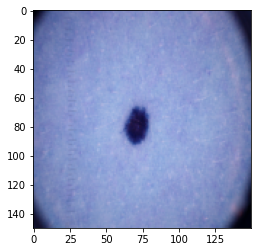

In [21]:
plt.imshow(x_test[344])

In [22]:
model.save('my_model.h5') 

In [23]:
new_model = tf.keras.models.load_model('my_model.h5')

In [24]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 50)        28850     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14450)             0

In [25]:
new_model.evaluate(x_tests,y_tests)

21/21 [==============================] - 0s 7ms/step - loss: 0.7692 - accuracy: 0.8470


[0.7691665291786194, 0.846969723701477]

In [26]:
from IPython.display import FileLink
FileLink(r'my_model.h5')
#click that blue file name for download link

/kaggle/working/my_model.h5

In [27]:
new_model.predict(x_tests[390:392])

array([[0.99999785],
       [0.9999813 ]], dtype=float32)

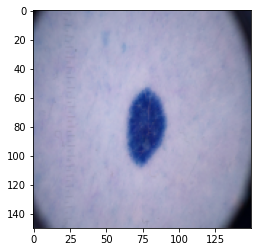

In [28]:
plt.imshow(x_test[200])